In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import datetime
import sys
import operator


# Variable N (N divsions of time interval)
N = int(input("\nPlease give the number of divisions"))

# Read data and convert it to dataframe
data = pd.read_csv("E:\MOCCA\Downloads\SocialNetwork\SocialMiniMini5k.csv", sep=' ')
graph_data = pd.DataFrame(data)
timestamps = graph_data['timestamp']
timestamps = pd.DataFrame(timestamps)


Please give the number of divisions2


In [2]:
# 1st Question

# Find tmin
tmin = timestamps.min()
print("\ntmin = " + datetime.datetime.fromtimestamp(tmin).strftime('%Y-%m-%d %H:%M:%S'))


tmin = 2008-08-01 08:17:57


In [3]:
# Find tmax
tmax = timestamps.max()
print("\ntmax = " + datetime.datetime.fromtimestamp(tmax).strftime('%Y-%m-%d %H:%M:%S'))


tmax = 2008-08-18 01:32:34


In [4]:
# 2nd Question

# Find intervals
intervals = np.array_split(data, N)
intervalsList = []
for i in intervals:
    intervalsList.append('(' + str(i['timestamp'].iloc[0]) + ',' + str(i['timestamp'].iloc[-1]) + ')')
for i, val in enumerate(intervalsList):
    print("\nTime Interval (" + str(i) + ") : From " +
         datetime.datetime.fromtimestamp(int(val.split(",")[0][1:])).strftime('%Y-%m-%d %H:%M:%S') + " To " +
         datetime.datetime.fromtimestamp(int(val.split(",")[1][:-1])).strftime('%Y-%m-%d %H:%M:%S')
         )


Time Interval (0) : From 2008-08-01 08:17:57 To 2008-08-11 16:01:25

Time Interval (1) : From 2008-08-11 16:06:48 To 2008-08-18 01:32:34


In [5]:
# 3rd Question

#Create graphs for each time interval
graphs = []
for i in range(0, N):
    directed_graph = nx.DiGraph()
    edges = [ (edge[0], edge[1], {'timestamp': edge[2] }) for edge in intervals[i].values ]
    directed_graph.add_edges_from(edges)
    graphs.append(directed_graph)


Type 0 to compute graph centralities or 1 to skip 0


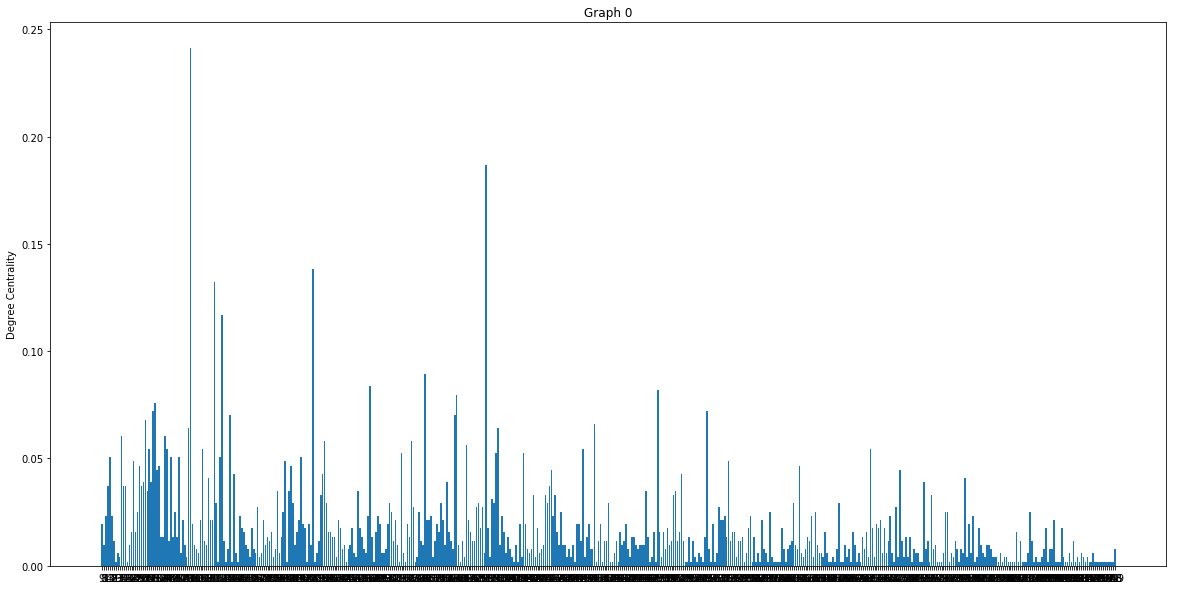

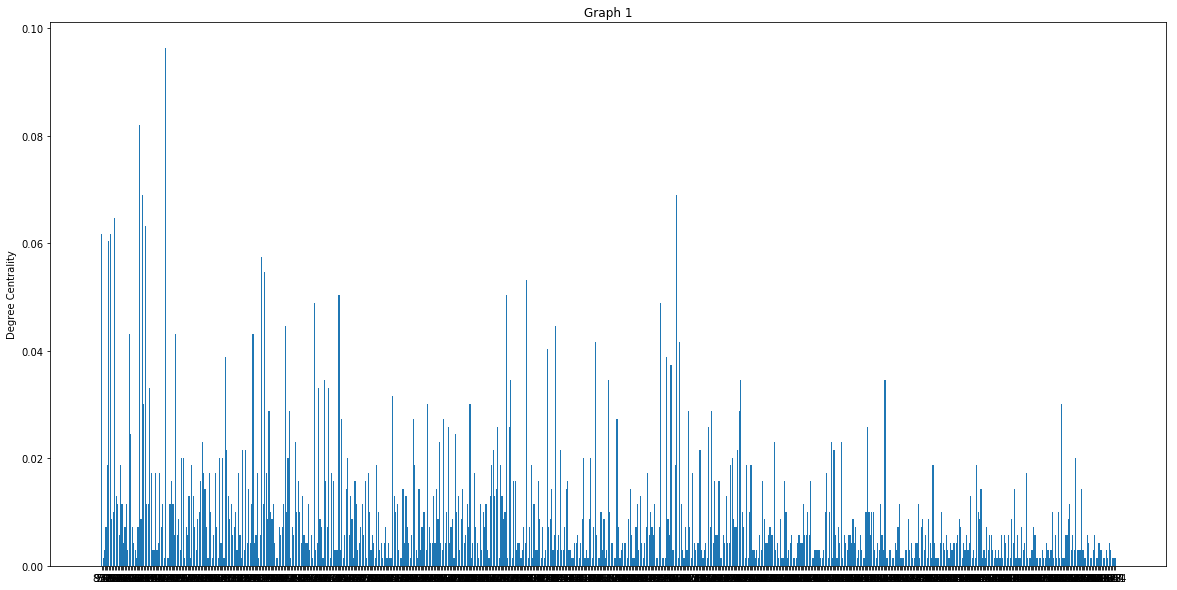

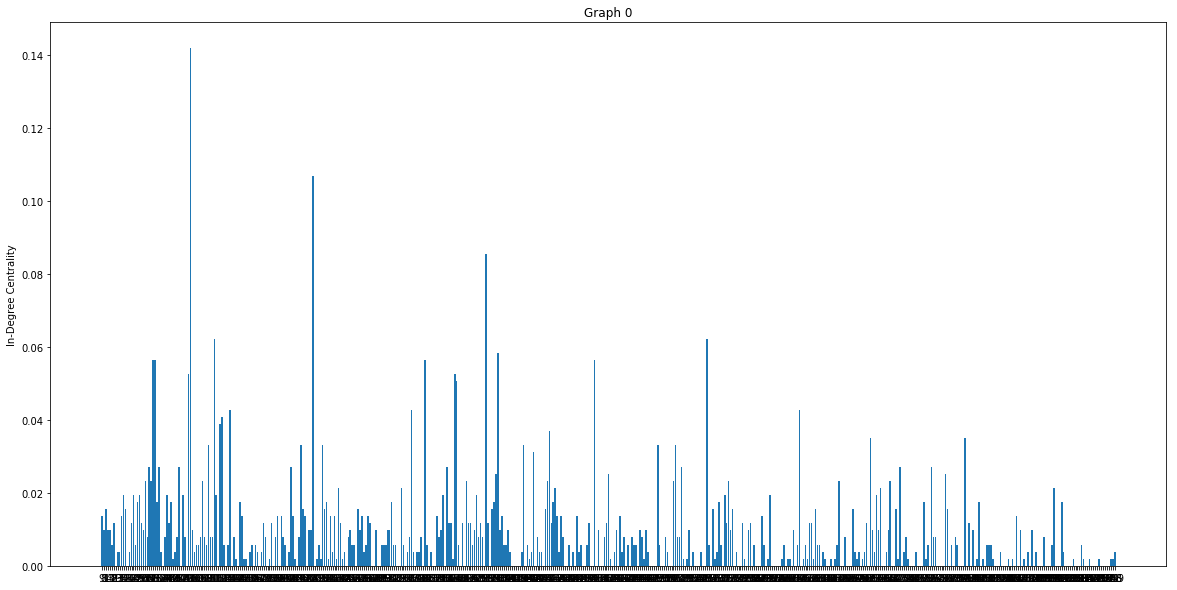

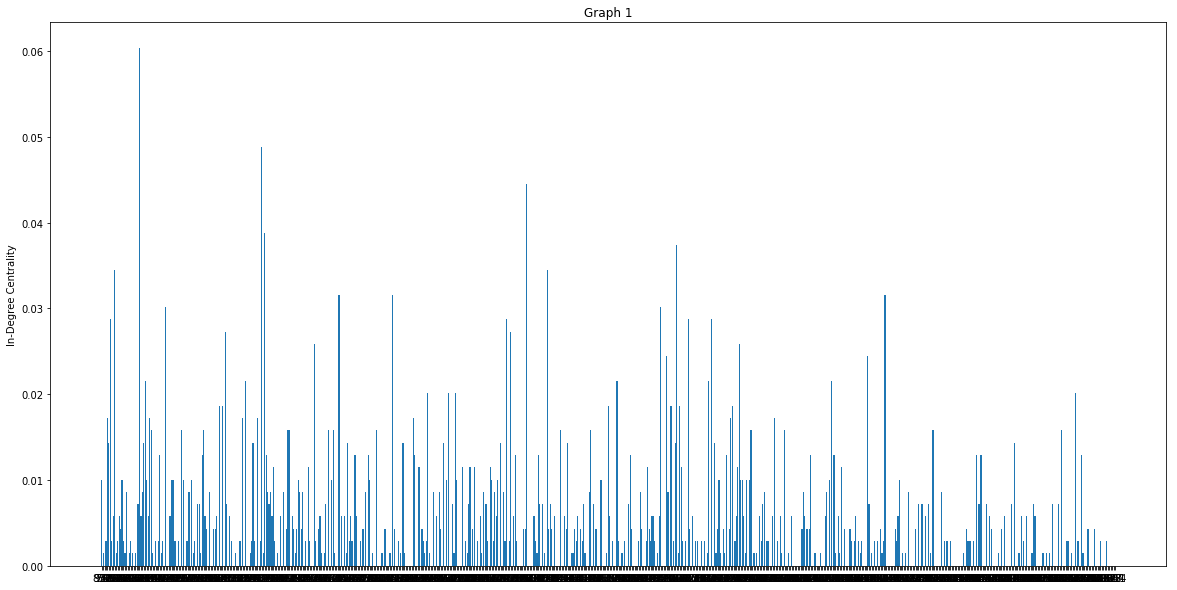

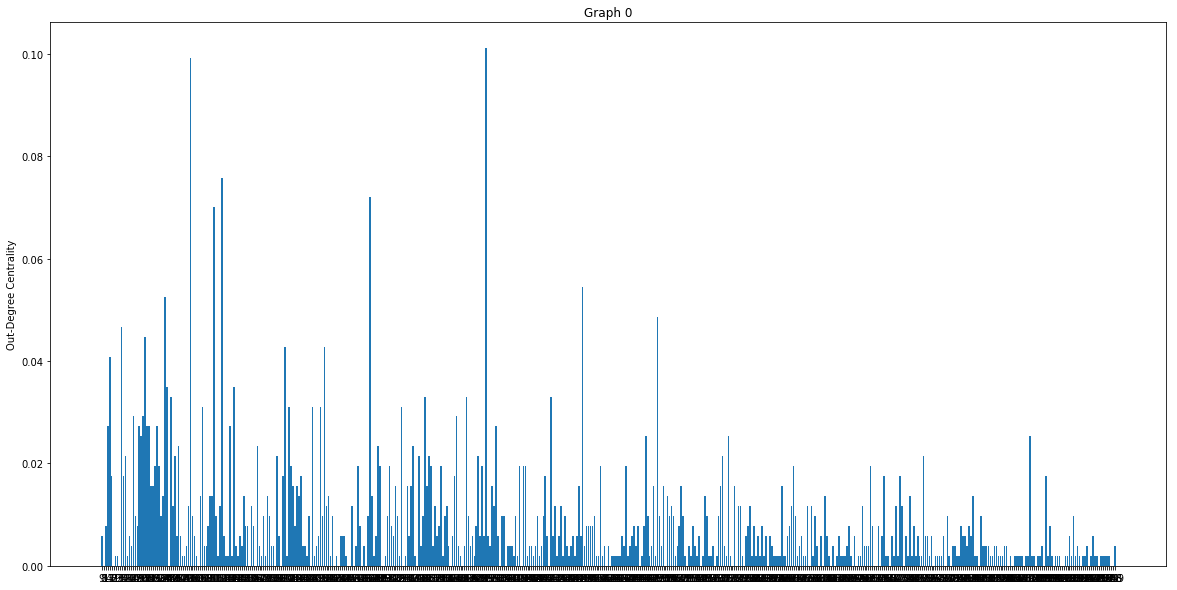

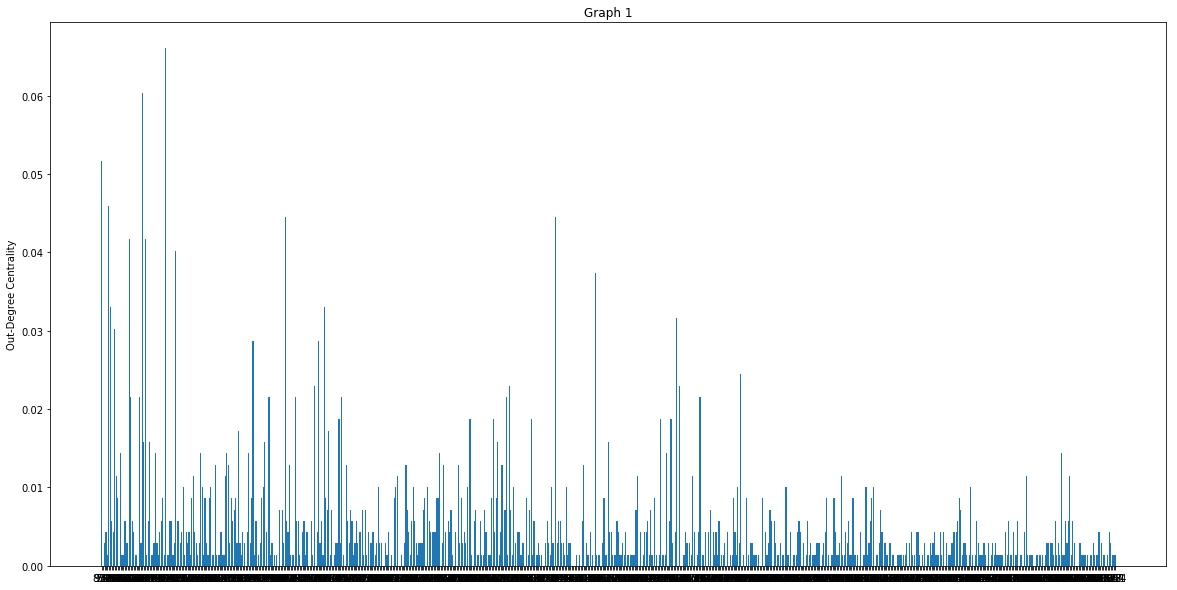

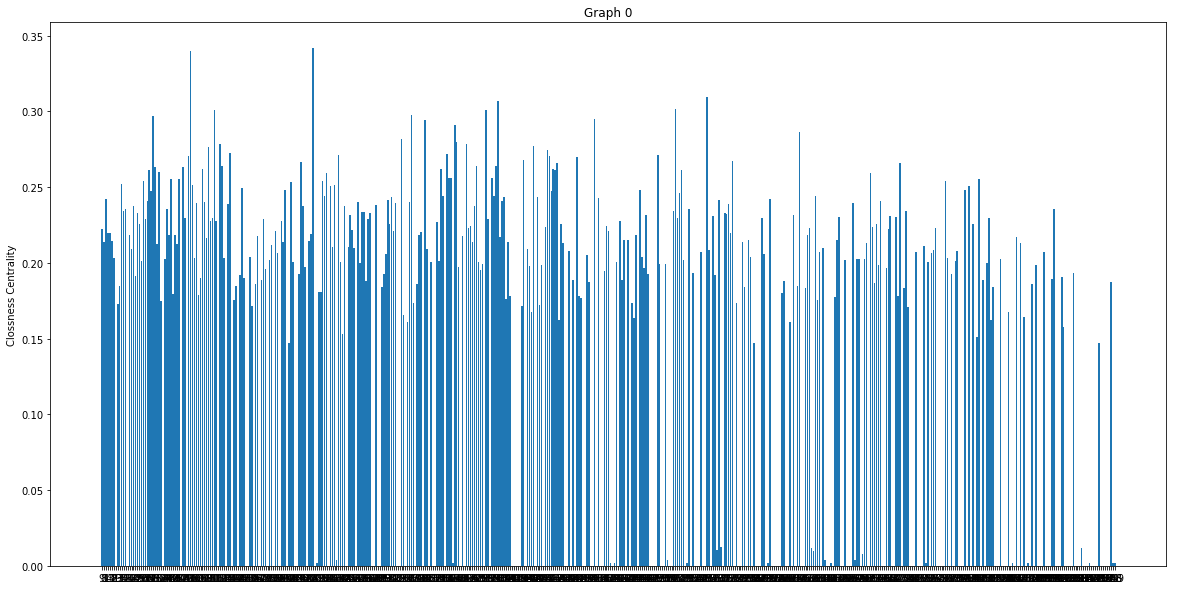

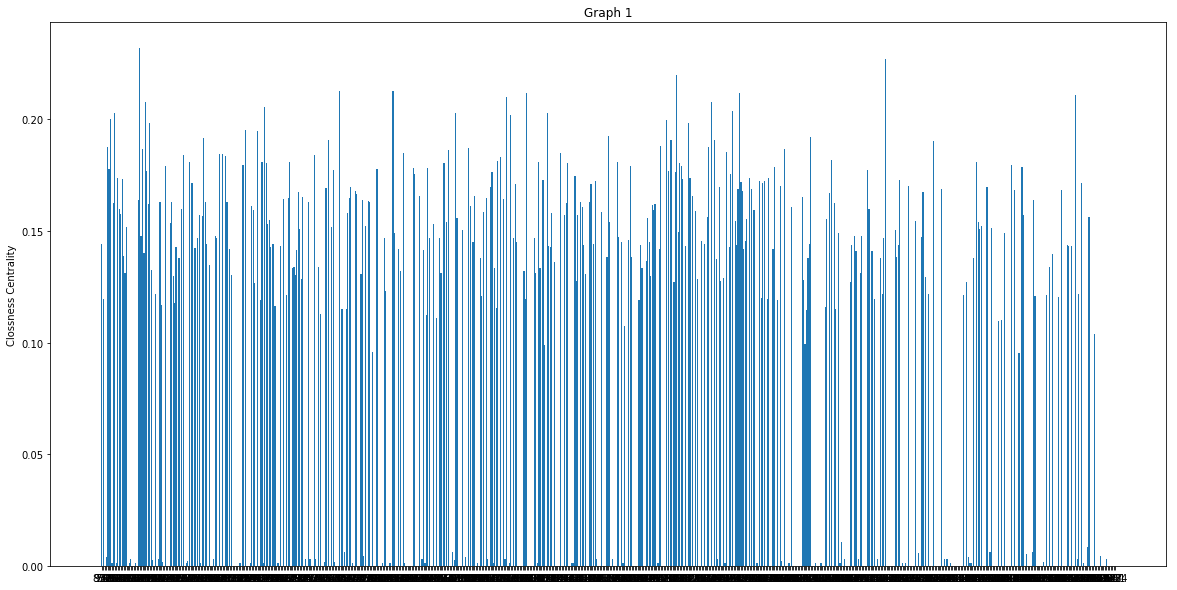

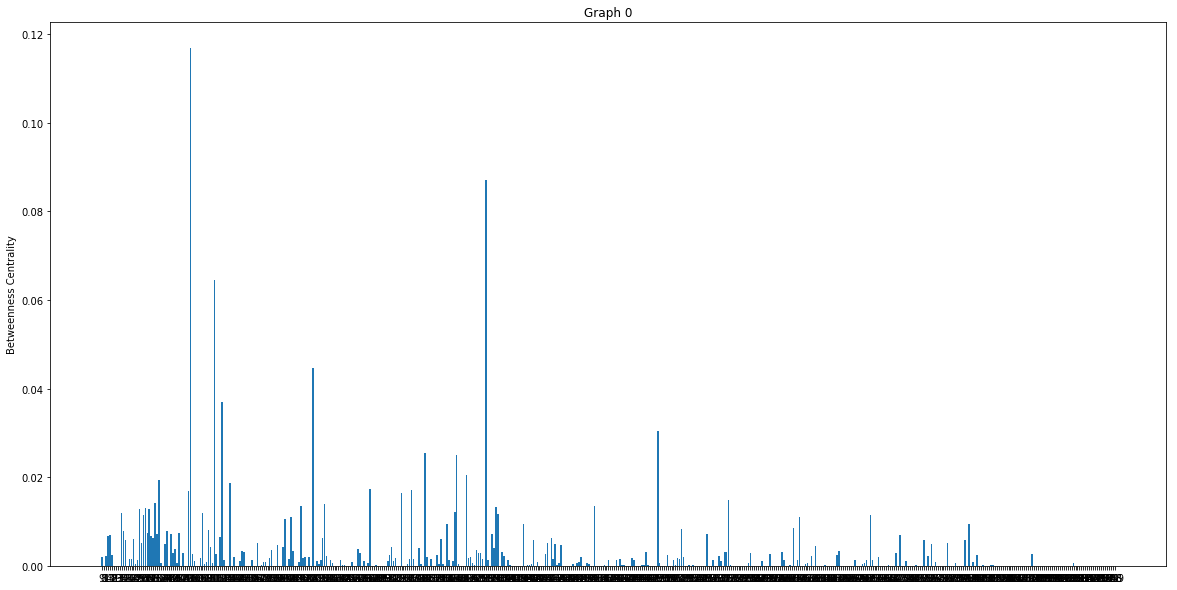

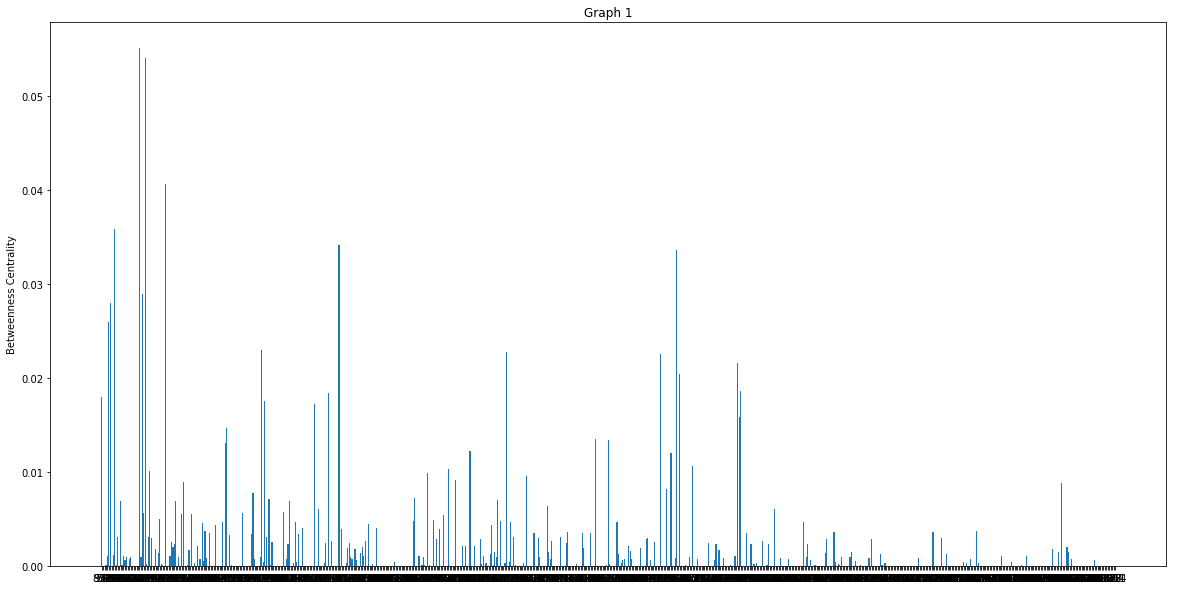

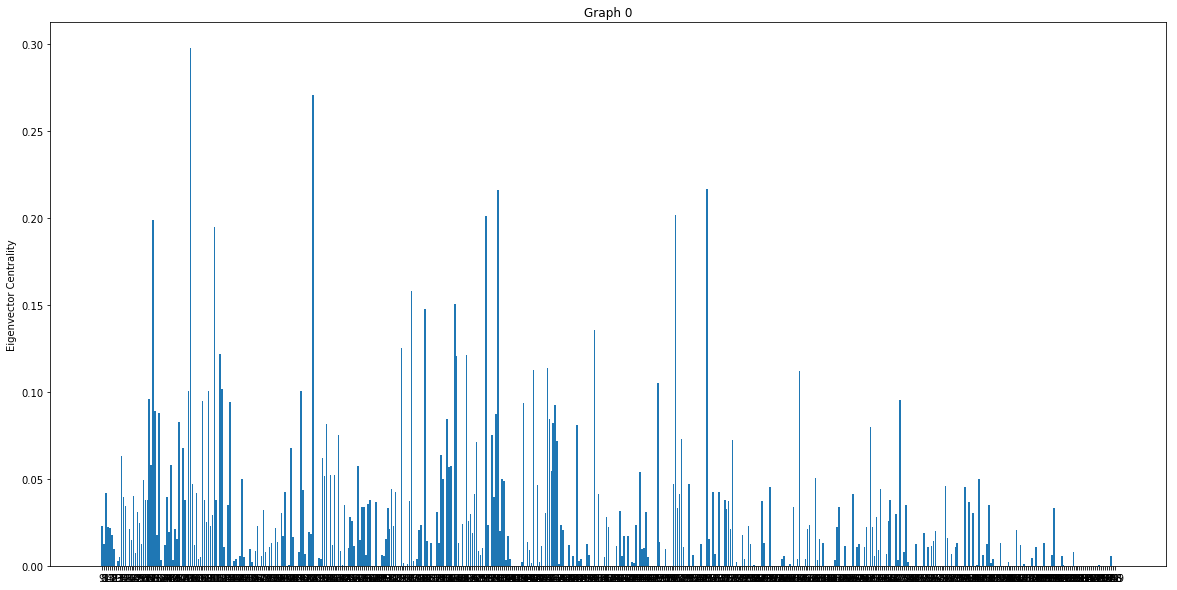

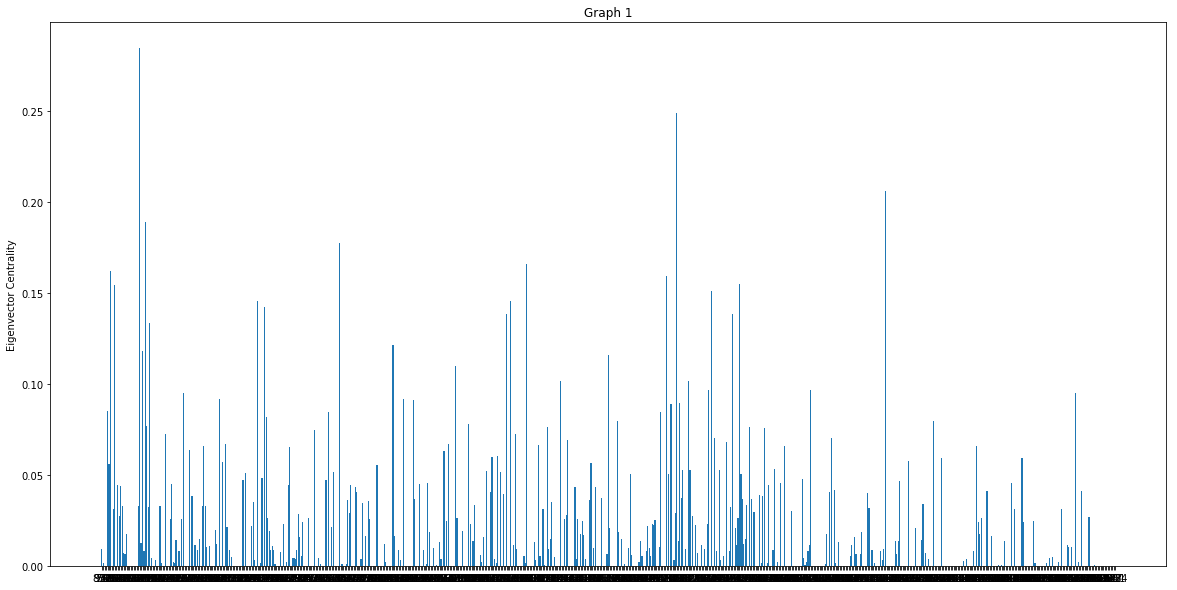

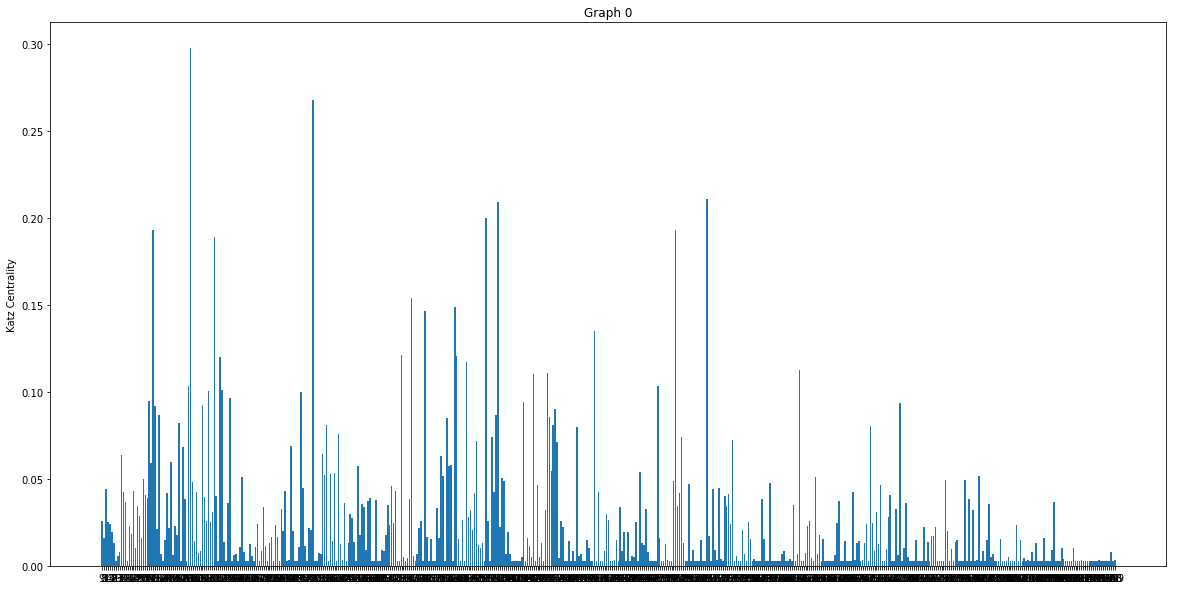

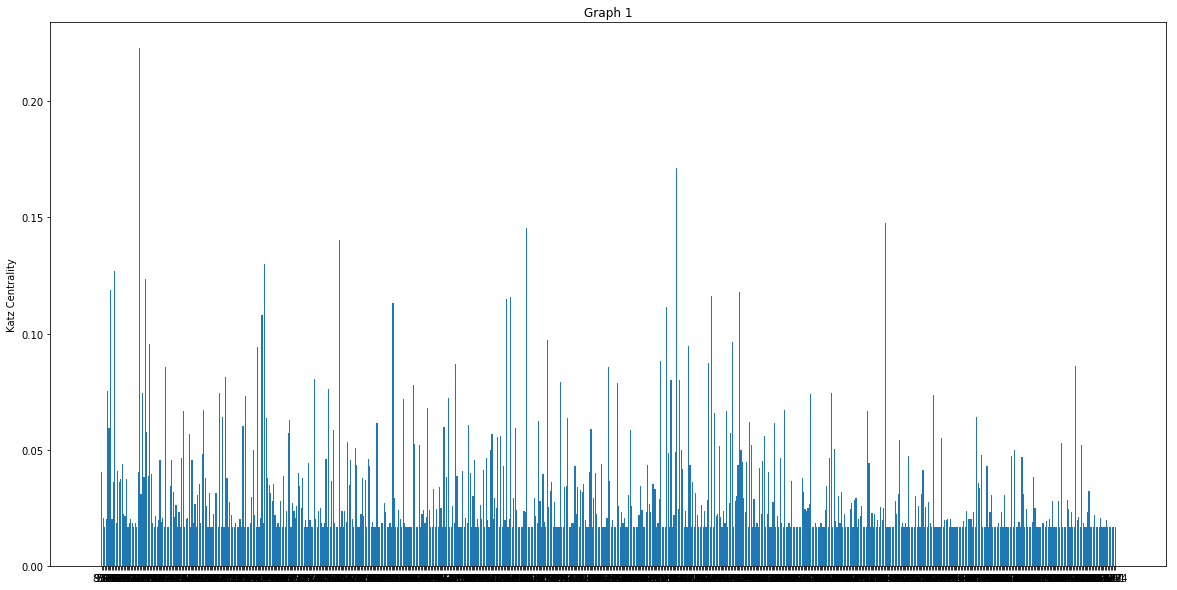

In [6]:
# 4th Question

# Centralities
centralities = input("\nType 0 to compute graph centralities or 1 to skip ")

if centralities == "0":
    # 1) Degree Centrality
    degree_centrality = []
    for i in range(0, N):
        degree_centrality.append(nx.degree_centrality(graphs[i]))
        plt.figure(figsize=(20,10))
        plt.bar(range(len(degree_centrality[i])), list(degree_centrality[i].values()), align='center')
        plt.xticks(range(len(degree_centrality[i])), list(degree_centrality[i].keys()))
        plt.title("Graph " + str(i))
        plt.ylabel('Degree Centrality')
        plt.show()

    # 2) In-Degree Centrality
    in_degree_centrality = []
    for i in range(0, N):
        in_degree_centrality.append(nx.in_degree_centrality(graphs[i]))
        plt.figure(figsize=(20,10))        
        plt.bar(range(len(in_degree_centrality[i])), list(in_degree_centrality[i].values()), align='center')
        plt.xticks(range(len(in_degree_centrality[i])), list(in_degree_centrality[i].keys()))
        plt.title("Graph " + str(i))
        plt.ylabel('In-Degree Centrality')
        plt.show()

    # 3) Out-Degree Centrality
    out_degree_centrality = []
    for i in range(0, N):
        out_degree_centrality.append(nx.out_degree_centrality(graphs[i]))
        plt.figure(figsize=(20,10))
        plt.bar(range(len(out_degree_centrality[i])), list(out_degree_centrality[i].values()), align='center')
        plt.xticks(range(len(out_degree_centrality[i])), list(out_degree_centrality[i].keys()))
        plt.title("Graph " + str(i))
        plt.ylabel('Out-Degree Centrality')
        plt.show()

    # 4) Clossness Centrality
    closeness_centrality = []
    for i in range(0, N):
        closeness_centrality.append(nx.closeness_centrality(graphs[i]))
        plt.figure(figsize=(20,10))
        plt.bar(range(len(closeness_centrality[i])), list(closeness_centrality[i].values()), align='center')
        plt.xticks(range(len(closeness_centrality[i])), list(closeness_centrality[i].keys()))
        plt.title("Graph " + str(i))
        plt.ylabel('Clossness Centrality')
        plt.show()

    # 5) Betweenness Centrality
    betweenness_degree_centrality = []
    for i in range(0, N):
        betweenness_degree_centrality.append(nx.betweenness_centrality(graphs[i]))
        plt.figure(figsize=(20,10))
        plt.bar(range(len(betweenness_degree_centrality[i])), list(betweenness_degree_centrality[i].values()), align='center')
        plt.xticks(range(len(betweenness_degree_centrality[i])), list(betweenness_degree_centrality[i].keys()))
        plt.title("Graph " + str(i))
        plt.ylabel('Betweenness Centrality')
        plt.show()

    # 6) Eigenvector Centrality
    eigenvector_degree_centrality = []
    for i in range(0, N):
        eigenvector_degree_centrality.append(nx.eigenvector_centrality_numpy(graphs[i]))
        plt.figure(figsize=(20,10))
        plt.bar(range(len(eigenvector_degree_centrality[i])), list(eigenvector_degree_centrality[i].values()), align='center')
        plt.xticks(range(len(eigenvector_degree_centrality[i])), list(eigenvector_degree_centrality[i].keys()))
        plt.title("Graph " + str(i))
        plt.ylabel('Eigenvector Centrality')
        plt.show()

    # 7) Katz Centrality
    katz_degree_centrality = []
    for i in range(0, N):
        katz_degree_centrality.append(nx.katz_centrality_numpy(graphs[i]))
        plt.figure(figsize=(20,10))
        plt.bar(range(len(katz_degree_centrality[i])), list(katz_degree_centrality[i].values()), align='center')
        plt.xticks(range(len(katz_degree_centrality[i])), list(katz_degree_centrality[i].keys()))
        plt.title("Graph " + str(i))
        plt.ylabel('Katz Centrality')
        plt.show()

In [7]:
# 5th Question

# Similarity Measures
similarities = input("\nType 0 to compute prediction success rates or 1 to skip ")

if similarities == "0":
    # Graph vars contains only the source nodes since neighbors()
    # returns only succesors nodes and not predeccesors.
    # graph_pairs is a list of dictionaries of the common nodes where
    # key is the source node and value is a list of size = N-1 containing
    # the edges of source node for each interval.
    graph_pairs = []
    for i in range(0, N - 1):
        graph_1 = [x for x in graphs[i].nodes if any(graphs[i].neighbors(x))]
        graph_2 = [x for x in graphs[i+1].nodes if any(graphs[i+1].neighbors(x))]
        common_nodes = set(graph_1).intersection(graph_2)
        graph_pairs.append( dict( (source_id, [list(graphs[i].edges(source_id)), list(graphs[i+1].edges(source_id)) ]) for source_id in common_nodes) )
    #print(graph_pairs[0])

    # Graph creation
    # sub_graphs is a list of graphs for each time interval
    # that contains only the common nodes
    sub_graphs = []
    # Create Directed Graph from graph_pairs dictionaries
    for i in range(0, N-1):
        sub_directed_graph = nx.DiGraph()
        for j in graph_pairs[i]:
            # edges contains the first list (edges of first time interval of pair)
            edges = graph_pairs[i][j][0]
            sub_directed_graph.add_edges_from(edges)
        sub_graphs.append(sub_directed_graph)

# 6th Question

    # Graph Distance
    sp_length_list = []
    for i in range(0, N-1):
        shortest_path_iterator = dict(nx.all_pairs_shortest_path_length(sub_graphs[i]))
        sp_length_list.append(shortest_path_iterator)

    # Common Neighbors
    common_neighbors_list = []
    for i in range(0, N-1):
        common_neighbors = {u:  {v: len(set(sub_graphs[i].successors(u)).intersection(
            set(sub_graphs[i].successors(v)))) for v in list(sub_graphs[i].nodes) } for u in list(sub_graphs[i].nodes) }
        common_neighbors_list.append(common_neighbors)

    # Convert Digraph to undirected to calculate next similarity measures
    sub_graphs_undirected = []
    for i in range(0, N-1):
        sub_graphs_undirected_graph = nx.Graph()
        sub_graphs_undirected_graph = sub_graphs[i].to_undirected()
        sub_graphs_undirected.append(sub_graphs_undirected_graph)
    sub_graphs_undirected

    # Jaccard's Coefficient
    jaccard_list = []
    for i in range(0, N-1):
        jaccard_iterator = nx.jaccard_coefficient(sub_graphs_undirected[i])
        iterator_to_list = []
        for j in jaccard_iterator:
            x, y, z = j
            iterator_to_list.append((x, y ,z))
        jaccard_dictionary = { x[0]: { y[1]: y[2] for y in iterator_to_list if y[0] == x[0] } for x in iterator_to_list }
        jaccard_list.append(jaccard_dictionary)

    # Adamic/Adar
    adamic_list = []
    for i in range(0, N-1):
        adamic_iterator = nx.adamic_adar_index(sub_graphs_undirected[i])
        iterator_to_list = []
        for j in adamic_iterator:
            x, y, z = j
            iterator_to_list.append((x, y ,z))
        adamic_dictionary = { x[0]: { y[1]: y[2] for y in iterator_to_list if y[0] == x[0] } for x in iterator_to_list }
        adamic_list.append(adamic_dictionary)

    # Preferential Attachment
    preferential_attachment_list = []
    for i in range(0, N-1):
        preferential_attachment_iterator = nx.preferential_attachment(sub_graphs_undirected[i])
        iterator_to_list = []
        for j in preferential_attachment_iterator:
            x, y, z = j
            iterator_to_list.append((x, y ,z))
        preferential_attachment_dictionary = { x[0]: { y[1]: y[2] for y in iterator_to_list if y[0] == x[0] } for x in iterator_to_list }
        preferential_attachment_list.append(preferential_attachment_dictionary)


Type 0 to compute prediction success rates or 1 to skip 0


In [29]:
# 7th Question

#Get percentages of top similarity measures from user
pGD = float(input("\nType percentage of top for Graph Distance"))
pCN = float(input("\nType percentage of top for Common Neighbors"))
pJC = float(input("\nType percentage of top for Jaccard's Coefficient"))
pA = float(input("\nType percentage of top for Adamic Adar"))
pPA = float(input("\nType percentage of top for Preferential Attachment"))

# List of dictionaries with similarity measures for each pair of graphs
similarity_measures_dicts = { 'pGD': sp_length_list, 'pCN':
    common_neighbors_list , 'pJC': jaccard_list, 'pA': adamic_list ,'pPA': preferential_attachment_list }
# Percentage of top similarity measures
similarity_measures_top = { 'pGD': pGD, 'pCN': pCN , 'pJC': pJC, 'pA': pA ,'pPA': pPA }
# Dictionary with final results for each measure
similarity_measures_final_results = { }
# Dictionary containing number of top edges, number of edges in next interval
# and successes for each measure
top_edges_successes_dict = { }
# Each iteration calculates results for each pair of graphs
for measure, top in similarity_measures_top.items():
    pair_graph_results = []
    top_edges_successes = []
    # Calculate success rate for each pair of graphs
    for i in range(0, N-1):
        top_int = int(sub_graphs[i].size()*top/100)
        max_dict = {}
        # Find max similarity measure for each key's edges
        for key, value in similarity_measures_dicts[measure][i].items():
            max_key = max(value.items(), key=operator.itemgetter(1))[0]
            max_dict[(key,max_key)] = value[max_key]
        # Get final top% edges based on similarity measures
        max_dict = dict(sorted(max_dict.items(), key=operator.itemgetter(1), reverse=True)[:top_int])
        # Delete edges where similarity measure is 0 or 0.0
        max_dict = {edge:similarity for edge,similarity in max_dict.items() if similarity!=0.0 and similarity!=0}
        successes = 0
        # Edges that exist in the second time interval of pair
        next_interval_edges = [ edges[1][i] for edges in graph_pairs[i].values() for i, val in enumerate(edges[1]) ]
        # Count successes of top edges (top edges that exist in second time interval)
        for edge in max_dict.keys():
            if edge in next_interval_edges:
                successes += 1
        pair_graph_results.append(successes / len(max_dict))
        top_edges_successes.append( (len(max_dict), len(next_interval_edges), successes) )
    similarity_measures_final_results[measure] = pair_graph_results
    top_edges_successes_dict[measure[1:]] = top_edges_successes
print("\n")
print(similarity_measures_final_results)
print("\n")
print(top_edges_successes_dict)


Type percentage of top for Graph Distance15

Type percentage of top for Common Neighbors15

Type percentage of top for Jaccard's Coefficient15

Type percentage of top for Adamic Adar15

Type percentage of top for Preferential Attachment15


{'pGD': [0.00411522633744856], 'pCN': [0.15637860082304528], 'pJC': [0.00411522633744856], 'pA': [0.012345679012345678], 'pPA': [0.01646090534979424]}


{'pGD': [(243, 1229, 1)], 'pCN': [(243, 1229, 38)], 'pJC': [(243, 1229, 1)], 'pA': [(243, 1229, 3)], 'pPA': [(243, 1229, 4)]}
